# Demo FACxTMS_2F (single satellite)

> Authors: Ashley Smith
>
> Abstract: Access to the field aligned currents evaluated by the single satellite method (level 2 product). We show simple line plots of the time series over short periods (minutes), from both Swarm Alpha and Charlie. We also compare with the alternative method whereby the FACs are evaluated locally by computing them from the magnetic field data (`B_NEC` from `MAGx_LR_1B`).

Documentation:

- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-2-product-definitions#FACxTMS_2F
- https://earth.esa.int/documents/10174/1514862/Swarm_L2_FAC_single_product_description

In [1]:
# %load_ext watermark
# %watermark -i -v -p viresclient,pandas,xarray,matplotlib

In [2]:
# %matplotlib widget  # seems to get stuck on "Loading widget ..."

In [3]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature

request = SwarmRequest()

### Check what "FAC" data variables are available

NB: these are the same as in the `FAC_TMS_2F` dual-satellite FAC product

In [4]:
# request.available_collections("FAC", details=False)

In [5]:
request.available_measurements("FAC")

['IRC',
 'IRC_Error',
 'FAC',
 'FAC_Error',
 'Flags',
 'Flags_F',
 'Flags_B',
 'Flags_q']

## Plotting as a time series

### Fetch one day from Swarm Alpha and Charlie

Also fetch the quasidipole (QD) coordinates and Orbit Number at the same time.

In [6]:
request.set_collection("SW_OPER_FACATMS_2F", "SW_OPER_FACCTMS_2F")
request.set_products(
    measurements=["FAC", "FAC_Error", 
                  "Flags", "Flags_F", "Flags_B", "Flags_q"],
    auxiliaries=["QDLat", "QDLon", "OrbitNumber"],
)
data = request.get_between(
    dt.datetime(2014,4,20),
    dt.datetime(2014,4,21)
)

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (14.696MB)


The source files of the original data are listed

In [7]:
data.sources

['SW_OPER_AUXAORBCNT_20131122T000000_20200209T000000_0001',
 'SW_OPER_AUXCORBCNT_20131122T000000_20200209T000000_0001',
 'SW_OPER_FACATMS_2F_20140420T000000_20140420T235959_0301',
 'SW_OPER_FACCTMS_2F_20140420T000000_20140420T235959_0301']

The data can be loaded as a pandas dataframe

In [8]:
df = data.as_dataframe()
df.head()

,Spacecraft,Latitude,Longitude,Radius,FAC,FAC_Error,Flags,Flags_F,Flags_B,Flags_q,QDLat,QDLon,OrbitNumber
2014-04-20 00:00:00.500,A,-26.849183,19.102806,6851357.065,0.005852,0.065746,0,2,0,0,-36.225574,87.688034,2267
2014-04-20 00:00:01.500,A,-26.785503,19.102319,6851350.555,0.008188,0.066112,0,2,0,0,-36.175095,87.712196,2267
2014-04-20 00:00:02.500,A,-26.721823,19.101828,6851344.035,0.012294,0.066744,0,2,0,0,-36.124565,87.736298,2267
2014-04-20 00:00:03.500,A,-26.658143,19.101333,6851337.505,0.002132,0.065236,0,2,0,0,-36.073990,87.760338,2267
2014-04-20 00:00:04.500,A,-26.594462,19.100834,6851330.965,-0.001669,0.064682,0,2,0,0,-36.023365,87.784325,2267


Alternatively we can load the data as an xarray Dataset, though in the following examples we use the data via a pandas DataFrame instead

In [9]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:      (Timestamp: 172800)
Coordinates:
  * Timestamp    (Timestamp) datetime64[ns] 2014-04-20T00:00:00.500000 ... 2014-04-20T23:59:59.500000
Data variables:
    Spacecraft   (Timestamp) <U1 'A' 'A' 'A' 'A' 'A' 'A' ... 'C' 'C' 'C' 'C' 'C'
    Latitude     (Timestamp) float64 -26.85 -26.79 -26.72 ... 87.31 87.33 87.33
    Longitude    (Timestamp) float64 19.1 19.1 19.1 19.1 ... 100.6 102.0 103.3
    Radius       (Timestamp) float64 6.851e+06 6.851e+06 ... 6.835e+06 6.835e+06
    FAC          (Timestamp) float64 0.005852 0.008188 ... 0.08035 0.005977
    FAC_Error    (Timestamp) float64 0.06575 0.06611 0.06674 ... 0.0453 0.05645
    Flags        (Timestamp) uint32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    Flags_F      (Timestamp) uint32 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2
    Flags_B      (Timestamp) uint32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    Flags_q      (Timestamp) uint32 0 0 0 0 0 ... 20020 20020 20020 20020 20020
    QDLat        (Timestamp) float64 -36.23 -36.18 -36.12 ... 81.26 81.27 81.27
    QDLon        (Timestamp) float64 87.69 87.71 87.74 ... 171.9 172.4 172.8
    OrbitNumber  (Timestamp) int32 2267 2267 2267 2267 ... 2279 2279 2279 2279
Attributes:
    Sources:         ['SW_OPER_AUXAORBCNT_20131122T000000_20200209T000000_000...
    MagneticModels:  []
    RangeFilters:    []

Depending on your application, you should probably do some filtering according to each of the flags. This can be done on the dataframe here, or beforehand on the server using [`request.set_range_filter()`](https://viresclient.readthedocs.io/en/latest/api.html#viresclient.SwarmRequest.set_range_filter). See https://earth.esa.int/documents/10174/1514862/Swarm_L2_FAC_single_product_description for more about the data

### Plot the time series (FAC and FAC_Error for Alpha)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


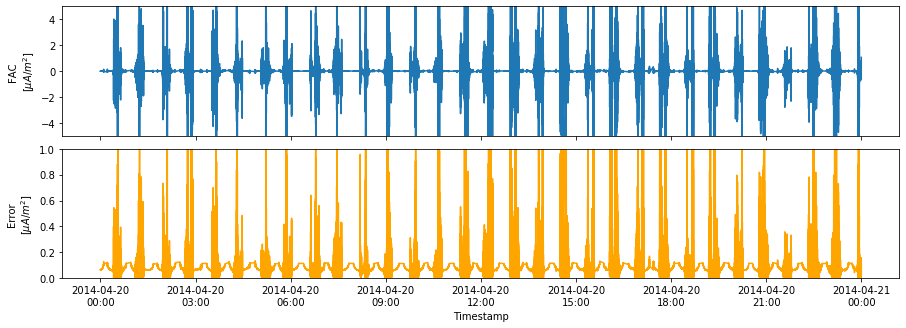

In [10]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(15,5))
# Select out the time series from Swarm Alpha
dfA = df.where(df["Spacecraft"] == "A").dropna()
axes[0].plot(dfA.index, dfA["FAC"])
axes[1].plot(dfA.index, dfA["FAC_Error"], color="orange")
axes[0].set_ylabel("FAC\n[$\mu A / m^2$]");
axes[1].set_ylabel("Error\n[$\mu A / m^2$]");
axes[1].set_xlabel("Timestamp");
date_format = mdates.DateFormatter('%Y-%m-%d\n%H:%M')
axes[1].xaxis.set_major_formatter(date_format)
axes[0].set_ylim(-5, 5);
axes[1].set_ylim(0, 1);
axes[0].set_xticklabels([])
fig.subplots_adjust(hspace=0.1)

### Plot a subset of the time series (FAC from Alpha and Charlie)

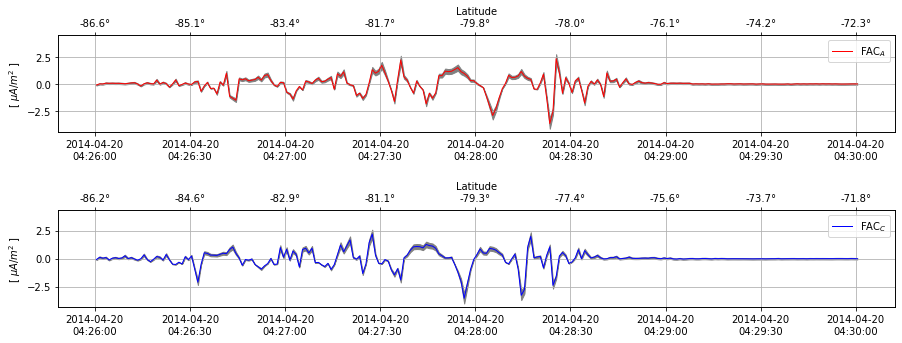

In [11]:
def line_plot(fig, ax, df, varname="FAC", spacecraft="A", color="red"):
    """Plot FAC as a line, given a dataframe"""
    df = df.copy()
    df = df.where(df["Spacecraft"] == spacecraft).dropna()
    ax.plot(df.index, df[varname], linewidth=1,
            label=f"{varname}$_{spacecraft}$", color=color)
    # Plot error range as filled area
    if varname is "FAC":
        ax.fill_between(df.index, 
                        df["FAC"] - df["FAC_Error"],
                        df["FAC"] + df["FAC_Error"], color="grey")
    # Adjust limits and label formatting
    datetime_format = "%Y-%m-%d\n%H:%M:%S"
    xlabel_format = mdates.DateFormatter(datetime_format)
    ax.xaxis.set_major_formatter(xlabel_format)
    ax.set_ylabel("[ $\mu A / m^2$ ]")
    # Make y-axis symmetric about zero
    ylim = max(abs(y) for y in ax.get_ylim())
    ax.set_ylim((-ylim, ylim))
    ax.legend()
    ax.grid(True)
    # Set up an extra xaxis at the top, to display Latitude
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(ax.get_xticks())
    # Identify closest times in dataframe to use for Latitude labels
    # NB need to draw the figure now in order to get the xticklabels
    #  https://stackoverflow.com/a/41124884
    fig.canvas.draw()
    # Extract times from the lower x axis
    # Use them to find the nearest Lat values in the dataframe
    xtick_times = [dt.datetime.strptime(ts.get_text(), datetime_format) for ts in ax.get_xticklabels()]
    ilocs = [df.index.get_loc(t, method="nearest") for t in xtick_times]
    lats = df.iloc[ilocs]["Latitude"]
    lat_labels = ["{}°".format(s) for s in np.round(lats.values, decimals=1)]
    ax2.set_xticklabels(lat_labels)
    ax2.set_xlabel("Latitude")

# Easy pandas-style slicing of the dataframe
df_subset = df['2014-04-20T04:26:00':'2014-04-20T04:30:00']
fig, axes = plt.subplots(nrows=2, figsize=(15, 5))
line_plot(fig, axes[0], df_subset, spacecraft="A", color="red")
line_plot(fig, axes[1], df_subset, spacecraft="C", color="blue")
fig.subplots_adjust(hspace=0.8)

FAC estimates from (top) Swarm Alpha and (bottom) Swarm Charlie. The error estimate is shown as a thin grey area

### Also show satellite location on a map

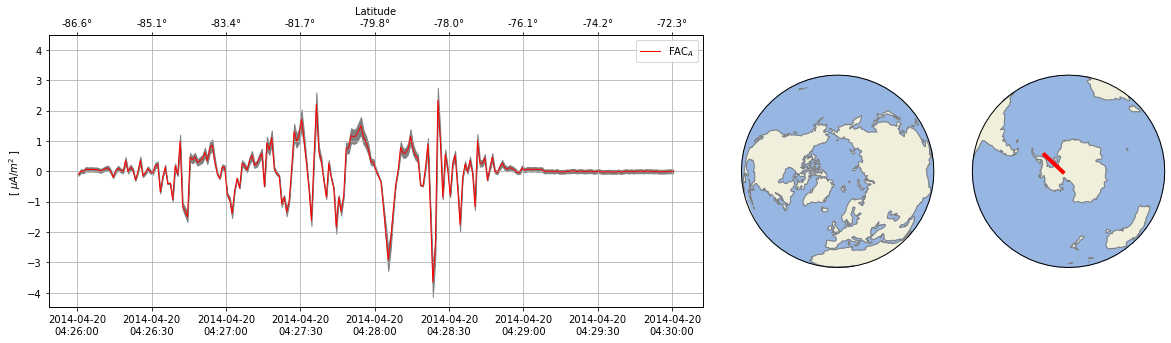

In [12]:
def line_plot_figure(df, spacecraft="A", color="red"):
    """Generate a figure containing both line plot and maps"""
    df = df.copy()
    df = df.where(df["Spacecraft"] == spacecraft).dropna()
    # Set up figure geometry together with North/South maps
    fig = plt.figure(figsize=(20, 5))
    ax_lineplot = plt.subplot2grid((1, 5), (0, 0), colspan=3, fig=fig)
    ax_N = plt.subplot2grid((1, 5), (0, 3), fig=fig,
        projection=ccrs.Orthographic(
            central_longitude=0.0, central_latitude=90.0
        ))
    ax_S = plt.subplot2grid((1, 5), (0, 4), fig=fig,
        projection=ccrs.Orthographic(
            central_longitude=0.0, central_latitude=-90.0
        ))
    for _ax in (ax_N, ax_S):
        _ax.set_global()
        _ax.coastlines(color="grey")
        _ax.add_feature(cfeature.LAND)
        _ax.add_feature(cfeature.OCEAN)
        _ax.plot(df["Longitude"], df["Latitude"], transform=ccrs.PlateCarree(),
                 linewidth=4, color=color)
    # Draw the line plot as before
    line_plot(fig, ax_lineplot, df, spacecraft=spacecraft, color=color)

line_plot_figure(df_subset, spacecraft="A", color="red")

## Comparing to values calculated locally from the B_NEC data (experimental)

ref https://nbviewer.jupyter.org/github/smithara/viresclient_examples/blob/master/swarmpyfac_dev.ipynb 

NB this is currently fixed to the time window and satellite combination (A and C) set above

In [13]:
from swarmpyfac.fac import single_sat_fac

def _fetch_data(start='2014-04-20T04:26:00',
                end='2014-04-20T04:30:02', spacecraft="A"):
    """Fetch B_NEC data and combined geomagnetic model for a given spacecraft"""
    request = SwarmRequest()
    request.set_collection(f"SW_OPER_MAG{spacecraft}_LR_1B")
    request.set_products(
        measurements=["B_NEC"],
        models=['Model = "MCO_SHA_2C" + "MLI_SHA_2C" + "MMA_SHA_2C-Primary" + "MMA_SHA_2C-Secondary"'])
    data = request.get_between(start, end,
                             asynchronous=False, show_progress=False)
    return data.as_xarray()

def _get_input_data_from_ds(ds):
    """Extract the "input_data" required from the dataset"""
    # convert time to unix time seconds
    ## if on a dataframe, df:
    ## time = np.array(df.index.astype(np.int64) / 10**9)
    # on xarray.Dataset:
    time = ds['Timestamp'].data.astype(np.int64) / 10**9
    theta = ds['Latitude'].data
    phi = ds['Longitude'].data
    r = ds['Radius'].data
    # equivalent to swarmpyfac.utils.pack_3d:
    positions = np.stack((theta, phi, r), axis=1)
    B_model = ds['B_NEC_Model'].data
    B_res = ds['B_NEC'].data - B_model
    return {'time': time, 'positions':positions,
            'B_res': B_res, 'B_model': B_model}

def _append_fac(ds=None):
    """Append FAC calculations to a dataset"""
    input_data = _get_input_data_from_ds(ds)
    output = single_sat_fac(**input_data)
    # outputs like these should probably be turned into a dict so that they can be identified
    irc = output[2]
    fac = output[3]
    time = output[0]
    # Append the new data to the dataset
    # https://xarray.pydata.org/en/stable/data-structures.html#dictionary-like-methods
    # Note that there must now be a new offset time coordinate
    ds.coords['Timestamp_2'] = pd.to_datetime(time, unit='s')
    ds[f'FAC_calculated'] = (('Timestamp_2',), fac)
    ds[f'IRC_calculated'] = (('Timestamp_2',), irc)
    return ds

def append_FAC_calculated_locally(df):
    """Use the functions above to evaluate FAC
    
    NB currently depends on the fixed time and spacecraft selection as before

    """
    # Create xarray datasets containing the FAC estimates from each of A and C
    ds_A = _append_fac(_fetch_data('2014-04-20T04:26:00',
                                 '2014-04-20T04:30:02', spacecraft="A"))
    ds_C = _append_fac(_fetch_data('2014-04-20T04:26:00',
                                 '2014-04-20T04:30:02', spacecraft="C"))
    # Transform them into a concatenated dataframe
    df_A = pd.DataFrame(ds_A["FAC_calculated"].to_pandas(), columns=["FAC_calc"])
    df_C = pd.DataFrame(ds_C["FAC_calculated"].to_pandas(), columns=["FAC_calc"])
    df_calc = pd.concat((df_A, df_C))
    del df_calc.index.name
    # Append them to the existing dataframe
    df = df.copy()
    df["FAC_new"] = df_calc["FAC_calc"]
    return df

### Evaluate FACs locally and append to the dataframe

In [14]:
df_subset = append_FAC_calculated_locally(df_subset)
df_subset["FAC_diff"] = df_subset["FAC"] - df_subset["FAC_new"]
df_subset.head()

,Spacecraft,Latitude,Longitude,Radius,FAC,FAC_Error,Flags,Flags_F,Flags_B,Flags_q,QDLat,QDLon,OrbitNumber,FAC_new,FAC_diff
2014-04-20 04:26:00.500,A,-86.569620,-96.717204,6853867.625,-0.101983,0.044831,0,2,0,0,-72.134789,9.942586,2270,-0.098387,-0.003597
2014-04-20 04:26:01.500,A,-86.528758,-95.910658,6853868.130,0.007275,0.061232,0,2,0,0,-72.075874,9.992803,2270,0.010885,-0.003611
2014-04-20 04:26:02.500,A,-86.487219,-95.123108,6853868.625,-0.004518,0.059475,0,2,0,0,-72.016953,10.042591,2270,-0.000895,-0.003623
2014-04-20 04:26:03.500,A,-86.445027,-94.354184,6853869.120,0.072944,0.071107,0,2,0,0,-71.958031,10.091966,2270,0.076575,-0.003631
2014-04-20 04:26:04.500,A,-86.402204,-93.603506,6853869.610,0.057414,0.068790,0,2,0,0,-71.899109,10.140932,2270,0.061051,-0.003637


### Plot the difference between the FAC sourced from the product, and the one evaluated locally

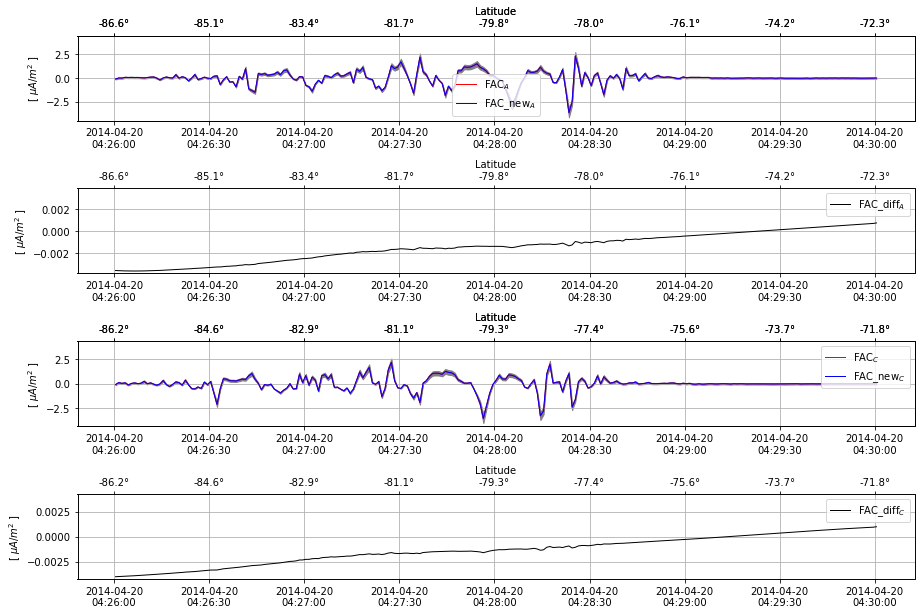

In [15]:
fig, axes = plt.subplots(nrows=4, figsize=(15, 10))
line_plot(fig, axes[0], df_subset, varname="FAC", spacecraft="A", color="red")
line_plot(fig, axes[0], df_subset, varname="FAC_new", spacecraft="A", color="blue")
line_plot(fig, axes[1], df_subset, varname="FAC_diff", spacecraft="A", color="black")
line_plot(fig, axes[2], df_subset, varname="FAC", spacecraft="C", color="red")
line_plot(fig, axes[2], df_subset, varname="FAC_new", spacecraft="C", color="blue")
line_plot(fig, axes[3], df_subset, varname="FAC_diff", spacecraft="C", color="black")
fig.subplots_adjust(hspace=0.8)